# Tipping Problem

##### Imports

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

##### Input Variables

In [2]:
opt_sensor = ctrl.Antecedent(np.arange(0, 10, 1), 'Optical Sensor')
ir_sensor = ctrl.Antecedent(np.arange(94, 109, 1), 'Infrared Sensor')

##### Output Variable

In [3]:
aud_signal = ctrl.Consequent(np.arange(500, 2001, 1), 'Audible Signal')

##### Member Functions

In [4]:
# Inputs
opt_sensor['slow'] = fuzz.trimf(opt_sensor.universe, [0, 0, 4])
opt_sensor['medium'] = fuzz.trimf(opt_sensor.universe, [3, 5, 7])
opt_sensor['fast'] = fuzz.trimf(opt_sensor.universe, [6, 9, 9])

ir_sensor['very low'] = fuzz.trimf(ir_sensor.universe, [94, 94, 97])
ir_sensor['low'] = fuzz.trimf(ir_sensor.universe, [96, 98, 100])
ir_sensor['medium'] = fuzz.trimf(ir_sensor.universe, [99, 101, 103])
ir_sensor['high'] = fuzz.trimf(ir_sensor.universe, [102, 104, 106])
ir_sensor['very high'] = fuzz.trimf(ir_sensor.universe, [105, 108, 108])

#output
aud_signal['very low'] = fuzz.trimf(aud_signal.universe, [500, 500, 900])
aud_signal['low'] = fuzz.trimf(aud_signal.universe, [700, 950, 1200])
aud_signal['medium'] = fuzz.trimf(aud_signal.universe, [1000, 1300, 1500])
aud_signal['high'] = fuzz.trimf(aud_signal.universe, [1350, 1600, 1850])
aud_signal['very high'] = fuzz.trimf(aud_signal.universe, [1700, 2000, 2000])

##### Viewing the membership functions

C:\Users\Bazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


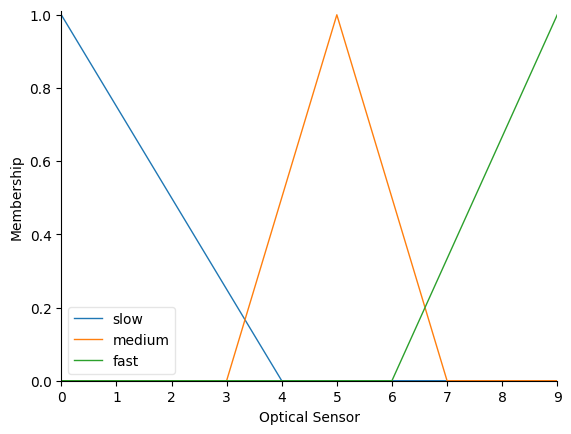

In [5]:
opt_sensor.view()

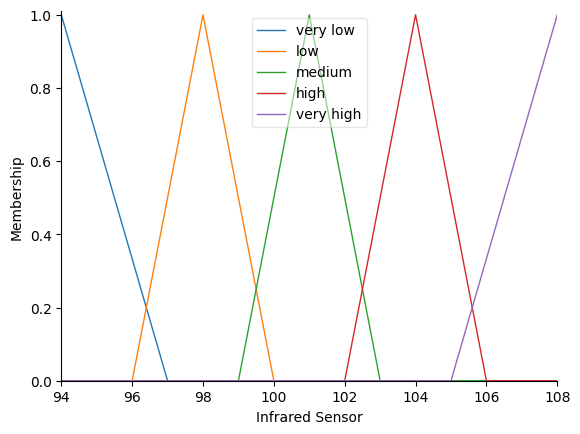

In [6]:
ir_sensor.view()

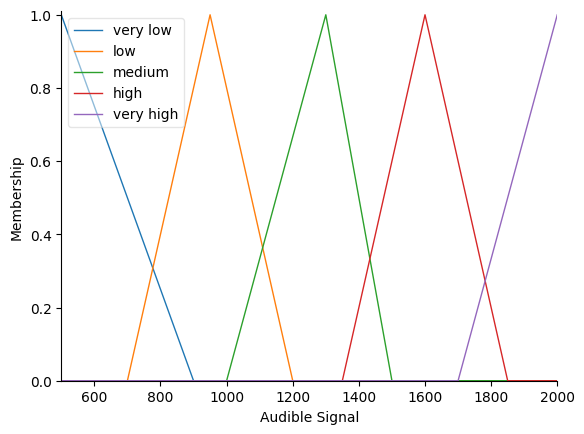

In [7]:
aud_signal.view()

##### Fuzzy Rules (defining fuzzy relationship b/w input and output variables)

In [8]:
rules = [
    ctrl.Rule(ir_sensor['very low'] & opt_sensor['slow'], aud_signal['very low']),
    ctrl.Rule(ir_sensor['very low'] & opt_sensor['medium'], aud_signal['low']),
    ctrl.Rule(ir_sensor['very low'] & opt_sensor['fast'], aud_signal['medium']),
    ctrl.Rule(ir_sensor['low'] & opt_sensor['slow'], aud_signal['low']),
    ctrl.Rule(ir_sensor['low'] & opt_sensor['medium'], aud_signal['medium']),
    ctrl.Rule(ir_sensor['low'] & opt_sensor['fast'], aud_signal['high']),
    ctrl.Rule(ir_sensor['medium'] & opt_sensor['slow'], aud_signal['very low']),
    ctrl.Rule(ir_sensor['medium'] & opt_sensor['medium'], aud_signal['low']),
    ctrl.Rule(ir_sensor['medium'] & opt_sensor['fast'], aud_signal['medium']),
    ctrl.Rule(ir_sensor['high'] & opt_sensor['slow'], aud_signal['low']),
    ctrl.Rule(ir_sensor['high'] & opt_sensor['medium'], aud_signal['medium']),
    ctrl.Rule(ir_sensor['high'] & opt_sensor['fast'], aud_signal['low']),
    ctrl.Rule(ir_sensor['very high'] & opt_sensor['slow'], aud_signal['very low']),
    ctrl.Rule(ir_sensor['very high'] & opt_sensor['medium'], aud_signal['low']),
    ctrl.Rule(ir_sensor['very high'] & opt_sensor['fast'], aud_signal['very low']),
]

(<Figure size 640x480 with 1 Axes>, <Axes: >)

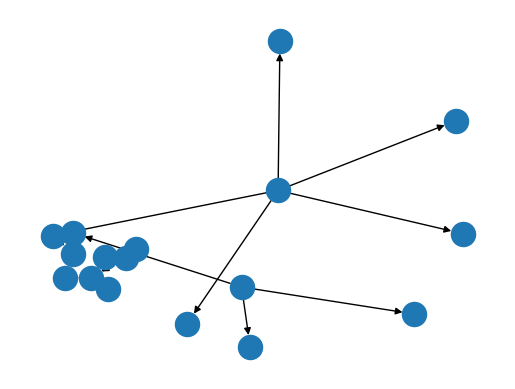

In [9]:
rules[0].view()

##### Control System creation and simulation

In [10]:
ctrl_system = ctrl.ControlSystem(rules)

In [11]:
p_detection = ctrl.ControlSystemSimulation(ctrl_system)

In [12]:
opt_sensor_spd = float(input ("Please enter the optical sensor speed [0-9]: "))
ir_sensor_temp = float(input ("Please enter the infrared sensor temperature [90-108]: "))

print("Optical Sensor Speed: ", opt_sensor_spd)
print("Infrared Sensor Speed: ", ir_sensor_temp)

Optical Sensor Speed:  5.0
Infrared Sensor Speed:  97.0


In [13]:
p_detection.input['Optical Sensor'] = opt_sensor_spd
p_detection.input['Infrared Sensor'] = ir_sensor_temp

##### Defuzzification

In [14]:
p_detection.compute()
print("Audible Signal: ", round(p_detection.output['Audible Signal'], 2),"ms")

Audible Signal:  1261.11 ms


In [15]:
myoutput = float(p_detection.output['Audible Signal'])
print(myoutput)

1261.1111111111106


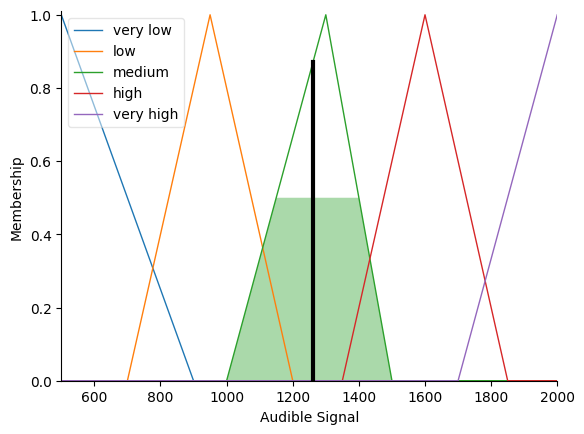

In [16]:
aud_signal.view(sim=p_detection)